In [1]:
#IMPORT
import numpy as np
import scipy as sp
from scipy import stats
import sys
import os
from pathlib import Path
import pickle
import matplotlib.pyplot as plt

current_dir = Path().resolve()

src_path = current_dir.parent / "src"

# Add to sys.path
sys.path.append(str(src_path))

import Utils as fx
from functions import *

# Large Phase Space

In [2]:
center = 0.6725
start = 0.4
end = 1
num_elements = 55
sigma_values = np.linspace(start, end, num_elements)
closest_index = np.abs(sigma_values - center).argmin()
sigma_values[closest_index] = center
sigma_values = np.sort(sigma_values)

center = 0.973
start = 0.6
end = 1.2
num_elements = 55
a_values = np.linspace(start, end, num_elements)
closest_index = np.abs(a_values - center).argmin()
a_values[closest_index] = center
a_values = np.sort(a_values)

In [3]:
# Specify the file path
file_path = "../data/Output/Phase_Space_res/R_phase_space.pkl"

# Load the data
try:
    with open(file_path, "rb") as f:
        R = pickle.load(f)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

File loaded successfully.


In [4]:
num_a = len(a_values)
num_sigma = len(sigma_values)
num_simulations = 1

AC1_R_matrix = np.zeros((num_a, num_sigma))

# Populate the matrices
for i, a in enumerate(a_values):
    for j, sigma in enumerate(sigma_values):
        # Extract R(t) for all initial conditions for the current (a, sigma)
        all_R = np.array(np.abs(R[a][sigma][0]))
        
        # Calculate CV
        AC1_R_matrix[i, j] = AC1(all_R,n=20)

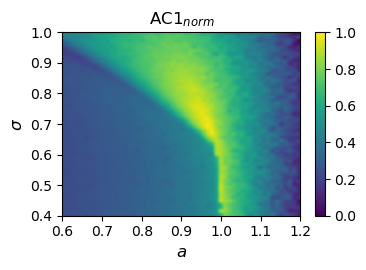

In [5]:
# Plot the heatmaps
plt.figure(figsize=(3.8, 2.8))
plt.imshow(((AC1_R_matrix-np.min(AC1_R_matrix))/(np.max(AC1_R_matrix)-np.min(AC1_R_matrix))).T, extent=[a_values[0], a_values[-1], sigma_values[0], sigma_values[-1]], 
           origin='lower', aspect='auto', cmap='viridis',interpolation='Gaussian')
plt.xticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2])
plt.colorbar()
plt.title(r"AC1$_{norm}$") #$(R(t))$
plt.xlabel(r"$a$",fontsize=12)
plt.ylabel(r"$\sigma$",fontsize=12)
#plt.plot([za_values[9],za_values[13]],[zsigma_values[5],zsigma_values[5]],c='k')

plt.tight_layout()
#plt.savefig('../figures/phase_plane_AC1.pdf',transparent=True,dpi=300)
plt.show()

# Zoomed Phase Space

In [6]:
start = 0.665
end = 0.715
num_elements = 21
zsigma_values = np.linspace(start, end, num_elements)

start = 0.94
end = 1.00
num_elements = 21
za_values = np.linspace(start, end, num_elements)

In [7]:
zsigma_values

array([0.665 , 0.6675, 0.67  , 0.6725, 0.675 , 0.6775, 0.68  , 0.6825,
       0.685 , 0.6875, 0.69  , 0.6925, 0.695 , 0.6975, 0.7   , 0.7025,
       0.705 , 0.7075, 0.71  , 0.7125, 0.715 ])

In [8]:
za_values

array([0.94 , 0.943, 0.946, 0.949, 0.952, 0.955, 0.958, 0.961, 0.964,
       0.967, 0.97 , 0.973, 0.976, 0.979, 0.982, 0.985, 0.988, 0.991,
       0.994, 0.997, 1.   ])

In [9]:
import pickle

# Specify the file path
file_path = "../data/Output/Phase_Space_zoom/R_phase_space.pkl"

# Load the data
try:
    with open(file_path, "rb") as f:
        zR = pickle.load(f)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

File loaded successfully.


In [10]:
cut=5000
num_a = len(za_values)
num_sigma = len(zsigma_values)
num_simulations = 1

# Initialize matrices for mean_var and var_mean
zAC1_R_matrix = np.zeros((num_a, num_sigma))

for i, a in enumerate(za_values):
    for j, sigma in enumerate(zsigma_values):
        # Extract R(t) for all initial conditions for the current (a, sigma)
        all_R = np.array(np.abs(zR[a][sigma][0][cut:]))
        zAC1_R_matrix[i, j] = AC1(all_R,n=20)

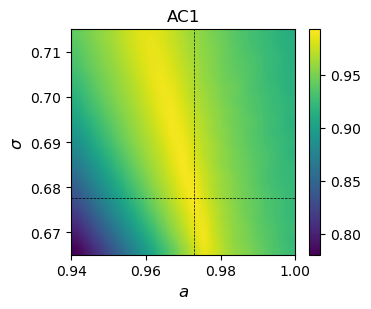

In [11]:
# Plot the heatmaps
plt.figure(figsize=(3.8, 3.2))
plt.title(r"AC1") #$(R(t))$
plt.imshow(((zAC1_R_matrix)).T, extent=[za_values[0], za_values[-1], zsigma_values[0], zsigma_values[-1]], 
           origin='lower', aspect='auto', cmap='viridis',interpolation='Gaussian')
plt.colorbar()
plt.xlabel(r"$a$",fontsize=12)
plt.ylabel(r"$\sigma$",fontsize=12)
plt.axhline(zsigma_values[5],linewidth=0.5,linestyle='--',c='k')
plt.axvline(za_values[11],linewidth=0.5,linestyle='--',c='k')

plt.tight_layout()
#plt.savefig('Figs/phase_plane_AC1_zoomed.pdf',transparent=True,dpi=300)
plt.show()

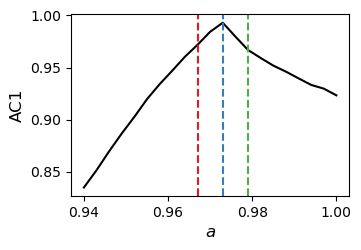

In [12]:
plt.figure(figsize=(3.8, 2.6))
#plt.title(r"$AC1(R(t))$")
plt.plot(za_values,zAC1_R_matrix[:,5],c='k')
plt.xlabel(r"$a$",fontsize=12)
plt.ylabel(r"AC1",fontsize=12)
plt.axvline(za_values[9],c=plt.get_cmap('Set1')(0),linestyle='--')
plt.axvline(za_values[11],c=plt.get_cmap('Set1')(1),linestyle='--')
plt.axvline(za_values[13],c=plt.get_cmap('Set1')(2),linestyle='--')
plt.tight_layout()
#plt.savefig('../figures/AC1_a.pdf',transparent=True,dpi=300)
plt.show()

# Simulated timeseries and Power laws

In [17]:
si=5 #1
# old point was a,sigma=3,11

In [19]:
zR_a=np.zeros((len(za_values),1195001))
#zPsi_a=np.zeros((len(za_values),1195001))
for i, a in enumerate(za_values):
    zR_a[i] = np.array(np.abs(zR[a][zsigma_values[si]][0][cut:]))
    #zPsi_a[i] = np.array(np.mod(zPsi[a][zsigma_values[si]][0][cut:],2*np.pi))

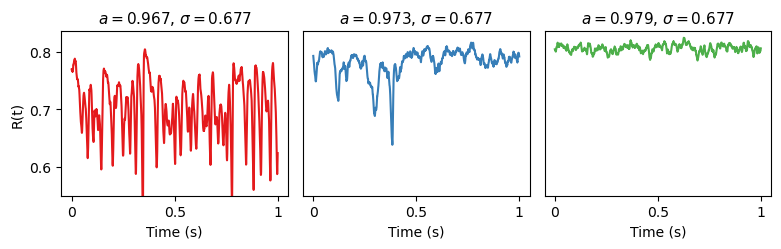

In [20]:
a_ids=[9,11,13]
set_colors=[plt.get_cmap('Set1')(0),plt.get_cmap('Set1')(1),plt.get_cmap('Set1')(2)]
plt.figure(figsize=(8,2.6))
for ii, i in enumerate(a_ids):
    plt.subplot(1,len(a_ids),ii+1)
    plt.title(r'$a=%.3f$, $\sigma=%.3f$'%(za_values[i],zsigma_values[si]),fontsize=11)
    plt.plot(zR_a[i,185000:205000],color=set_colors[ii])
    plt.ylim((0.55,0.835))
    if ii<1:
        plt.ylabel('R(t)')
    else:
        plt.yticks([])
    plt.xticks([0,10000,20000],['0','0.5','1'])
    plt.xlabel('Time (s)')
plt.tight_layout()
#plt.savefig('Figs/Timeseries.pdf',transparent=True,dpi=300)
plt.show()


In [21]:
[za_values[9],za_values[10],za_values[11],za_values[12],za_values[13]]

[0.967, 0.97, 0.973, 0.976, 0.979]

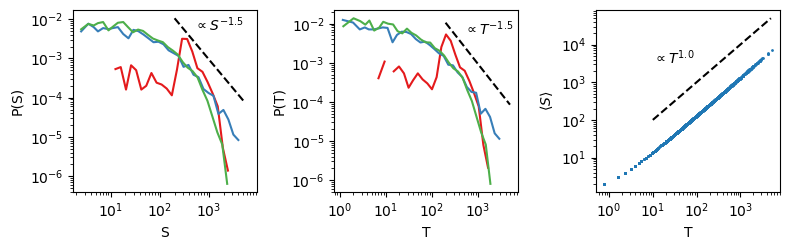

In [22]:
plt.figure(figsize=(8,2.6))
plt.subplot(1,3,1)
for ii, i in enumerate(a_ids):
    siz,dur=ava.measure_events(np.abs(zR_a[i,:]),threshold=np.median(np.abs(zR_a[i,:])),dir=-1)
    fx.plot_pdf(siz,color=set_colors[ii],label='a=%.3f'%za_values[i])
    plt.xlabel('S')
    plt.ylabel('P(S)')
# plot fit
exponent_s = -1.5 
x_vals = np.array([200, 5000], dtype=float)
A = 3e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent_s
plt.plot(x_vals, y_vals, 'k--')
plt.text(500,0.005,fr'$\propto S^{{{exponent_s}}}$')


plt.subplot(1,3,2)
for ii, i in enumerate(a_ids):
    siz,dur=ava.measure_events(np.abs(zR_a[i,:]),threshold=np.median(np.abs(zR_a[i,:])),dir=-1)
    fx.plot_pdf(dur,color=set_colors[ii],label='a=%.3f'%za_values[i])
    plt.xlabel('T')
    plt.ylabel('P(T)')
    
# plot fit
exponent_t = -1.5 
x_vals = np.array([200, 5000], dtype=float)
A = 3e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent_t
plt.plot(x_vals, y_vals, 'k--')
plt.text(500,0.005,fr'$\propto T^{{{exponent_t}}}$')


plt.subplot(1,3,3)
siz,dur=ava.measure_events(np.abs(zR_a[11,:]),threshold=np.median(np.abs(zR_a[11,:])),dir=-1)
plt.scatter(dur,siz,s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\langle S \rangle $')
plt.xlabel('T')
# plot fit
exponent = (exponent_t-1)/(exponent_s-1)
x_vals = np.array([10, 5000], dtype=float)
A = 1e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent
plt.plot(x_vals, y_vals, 'k--')
plt.text(10,3000,fr'$\propto T^{{{exponent}}}$')

plt.tight_layout()
#plt.savefig('Figs/PowerlawS.pdf',transparent=True, dpi=300)
plt.show()

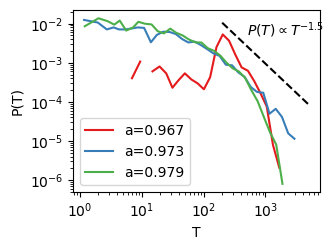

In [23]:
plt.figure(figsize=(3.4,2.6))
exponent = -1.5 
x_vals = np.array([200, 5000], dtype=float)
A = 3e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent
plt.plot(x_vals, y_vals, 'k--')
for ii, i in enumerate(a_ids):
    siz,dur=ava.measure_events(np.abs(zR_a[i,:]),threshold=np.median(np.abs(zR_a[i,:])),dir=-1)
    fx.plot_pdf(dur,color=set_colors[ii],label='a=%.3f'%za_values[i])
    plt.xlabel('T')
    plt.ylabel('P(T)')
    plt.legend()
plt.text(500,0.005,fr'$P(T)\propto T^{{{exponent}}}$')
plt.tight_layout()
#plt.savefig('Figs/PowerlawT.pdf',dpi=300)
plt.show()

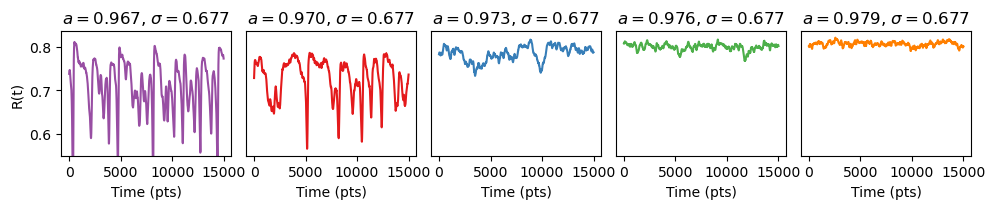

In [24]:
a_ids=[9,10,11,12,13]
set_colors=[plt.get_cmap('Set1')(3),plt.get_cmap('Set1')(0),plt.get_cmap('Set1')(1),plt.get_cmap('Set1')(2),plt.get_cmap('Set1')(4)]
plt.figure(figsize=(10,2.2))
for ii, i in enumerate(a_ids):
    plt.subplot(1,len(a_ids),ii+1)
    plt.title(r'$a=%.3f$, $\sigma=%.3f$'%(za_values[i],zsigma_values[si]))
    plt.plot(zR_a[i,:15000],color=set_colors[ii])
    plt.ylim((0.55,0.835))
    if ii<1:
        plt.ylabel('R(t)')
    else:
        plt.yticks([])
    plt.xlabel('Time (pts)')
plt.tight_layout()
#plt.savefig('Figs/Timeseries.pdf',dpi=300)
plt.show()


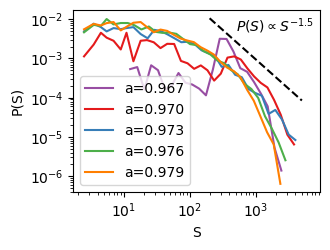

In [25]:
plt.figure(figsize=(3.4,2.6))
exponent = -1.5 
x_vals = np.array([200, 5000], dtype=float)
A = 3e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent
plt.plot(x_vals, y_vals, 'k--')
for ii, i in enumerate(a_ids):
    siz,dur=ava.measure_events(np.abs(zR_a[i,:]),threshold=np.median(np.abs(zR_a[i,:])),dir=-1)
    fx.plot_pdf(siz,color=set_colors[ii],label='a=%.3f'%za_values[i])
    plt.xlabel('S')
    plt.ylabel('P(S)')
    plt.legend()
plt.text(500,0.005,fr'$P(S)\propto S^{{{exponent}}}$')
plt.tight_layout()
#plt.savefig('Figs/PowerlawS.pdf',dpi=300)
plt.show()

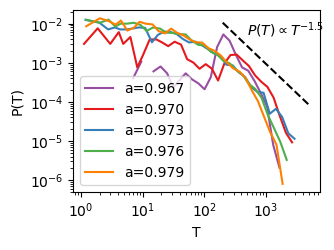

In [26]:
plt.figure(figsize=(3.4,2.6))
exponent = -1.5 
x_vals = np.array([200, 5000], dtype=float)
A = 3e1  # Adjust this constant for visibility
y_vals = A * x_vals**exponent
plt.plot(x_vals, y_vals, 'k--')
for ii, i in enumerate(a_ids):
    siz,dur=ava.measure_events(np.abs(zR_a[i,:]),threshold=np.median(np.abs(zR_a[i,:])),dir=-1)
    fx.plot_pdf(dur,color=set_colors[ii],label='a=%.3f'%za_values[i])
    plt.xlabel('T')
    plt.ylabel('P(T)')
    plt.legend()
plt.text(500,0.005,fr'$P(T)\propto T^{{{exponent}}}$')
plt.tight_layout()
#plt.savefig('Figs/PowerlawT.pdf',dpi=300)
plt.show()